<a href="https://colab.research.google.com/github/spycoder01/100-days-ml/blob/main/outlier_removal_iqr_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('/content/placement1.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [117]:
df.shape

(1000, 3)

In [118]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

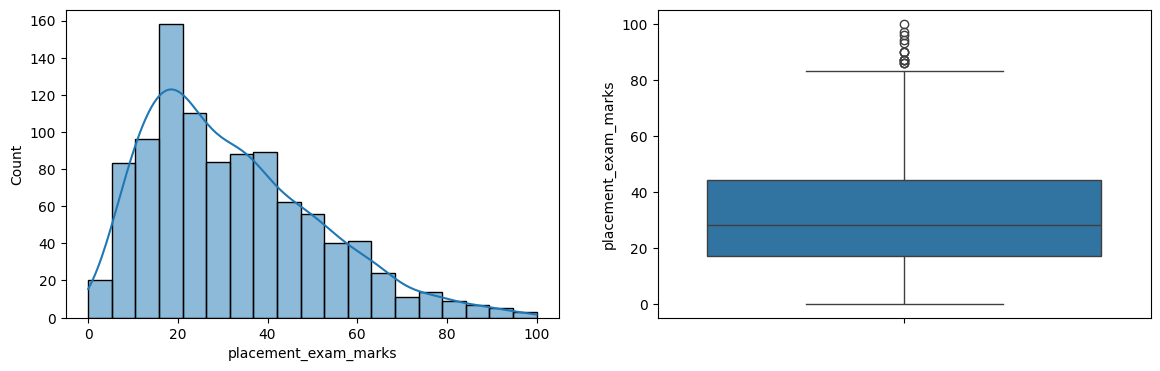

In [119]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])

Finding Interquartile range

In [120]:
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25)

In [121]:
print('percentile75',percentile75)
print('percentile25',percentile25)

percentile75 44.0
percentile25 17.0


In [122]:
iqr = percentile75-percentile25 # iqr = Q3-Q1
iqr

np.float64(27.0)

Finding Upper and Lower Limit

In [123]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [124]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 84.5
lower_limit -23.5


Finding Outliers

In [125]:
trim_df = df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]
trim_df

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [126]:
trim_df.shape

(15, 3)

New DataFrame

In [127]:
new_df = df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks']>lower_limit)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
575,7.55,16.0,0
860,7.51,21.0,0
740,6.21,74.0,1
435,7.45,37.0,0
711,6.97,30.0,1


In [128]:
new_df.shape

(985, 3)

<Axes: ylabel='placement_exam_marks'>

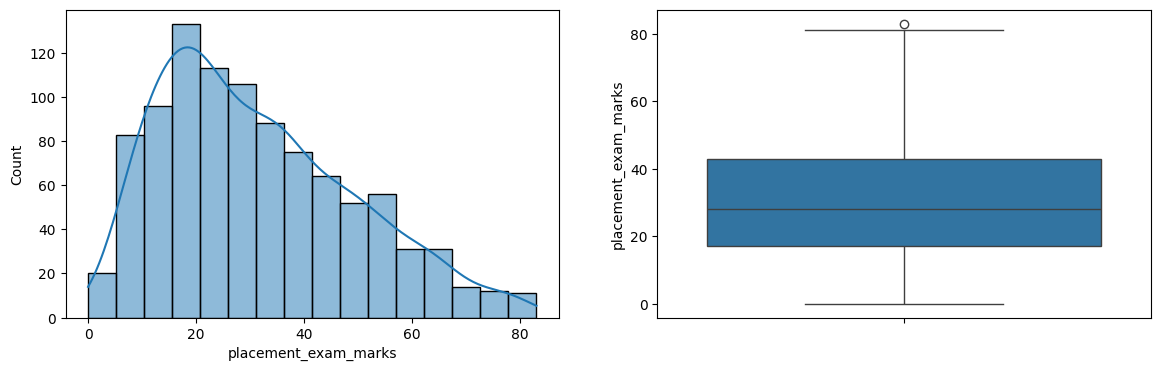

In [129]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])

Distribution plot before and after outliers removal

/tmp/ipython-input-3718588998.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-3718588998.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

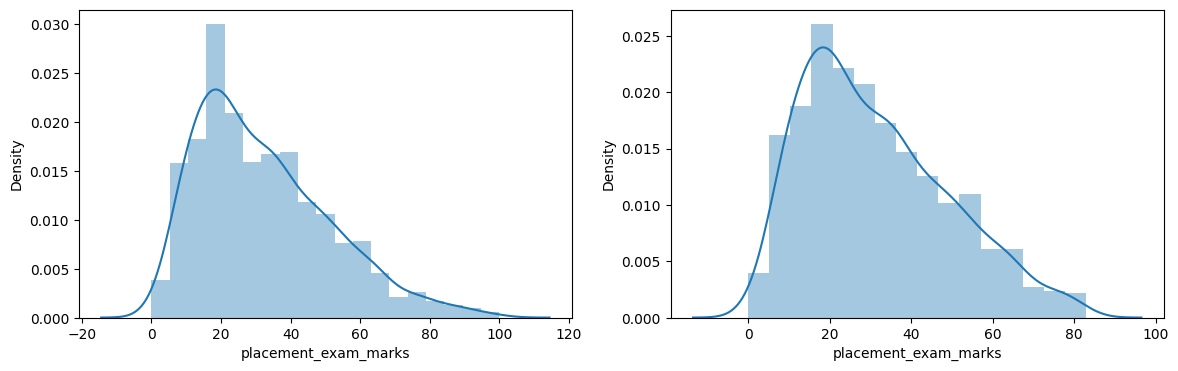

In [130]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(new_df['placement_exam_marks'])

# Capping

In [131]:
# Here we are using np.where function to cap (creatung a limit)
df_cap = df.copy()

df_cap['placement_exam_marks'] = np.where(
    df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
    df_cap['placement_exam_marks'] < lower_limit,
    lower_limit,
    df_cap['placement_exam_marks']
)
)

In [133]:
df_cap.shape

(1000, 3)

/tmp/ipython-input-3308348677.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

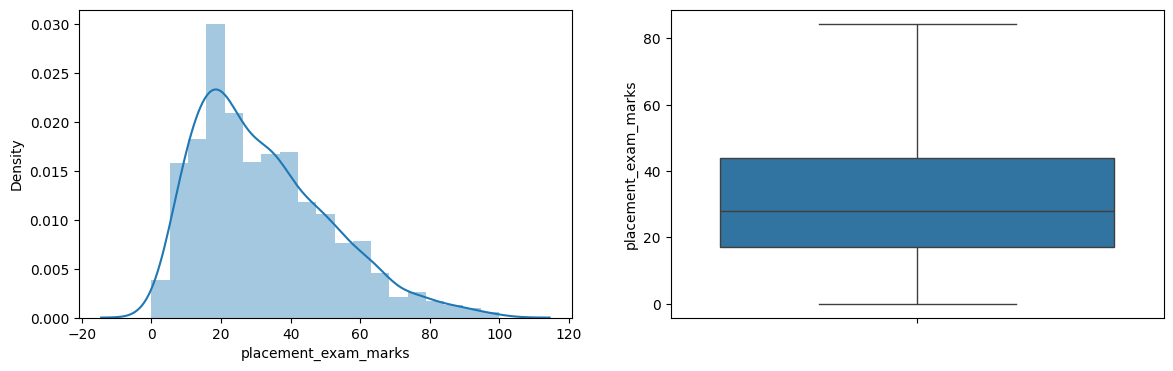

In [136]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(df_cap['placement_exam_marks'])

/tmp/ipython-input-2345719870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-2345719870.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

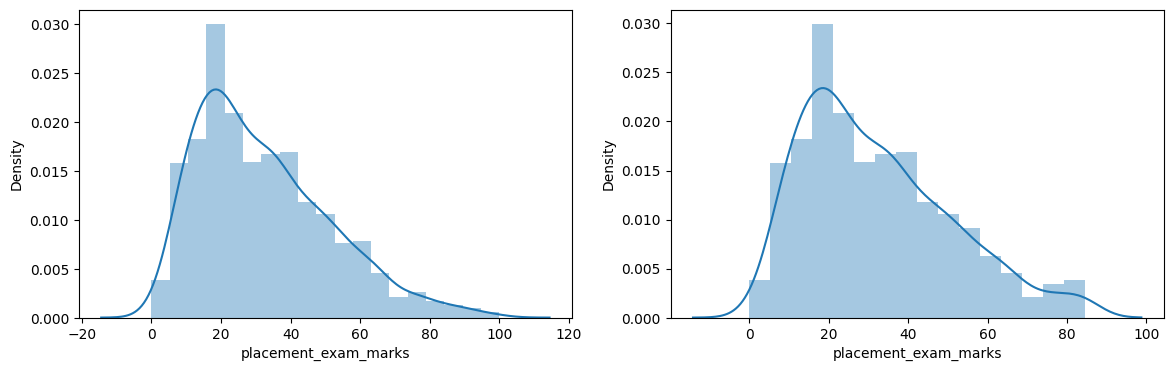

In [137]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(df_cap['placement_exam_marks'])